# Exploratory analysis for dataset obtained from startuptracker.io  (Work In Progress)

More details about the dataset here: https://github.com/OmdenaAI/Katapult/tree/main/Task%204%20-%20Data%20Collection/start_up_io

In [1]:
import pandas as pd
import numpy as np
from quantiphy import Quantity
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns

## Reading and describing dataset

In [2]:
df_startups_org = pd.read_csv('../../Task 4 - Data Collection/start_up_io/data_from_startup_io.csv')
df_startups = df_startups_org.copy()  # Making a copy to work with it, so that the original is accesible without reading the file
print(df_startups.dtypes)
df_startups.head()

market               object
products             object
launch_stage         object
activity_level       object
activity_verified    object
pageviews            object
team_member          object
founded_by           object
revenue_stage        object
revenue_through      object
twitter_followers    object
percentile            int64
amount_raised        object
company_website      object
description          object
name                 object
founded              object
place                object
crunchbase_link      object
ranking              object
dtype: object


,market,products,launch_stage,activity_level,activity_verified,pageviews,team_member,founded_by,revenue_stage,revenue_through,twitter_followers,percentile,amount_raised,company_website,description,name,founded,place,crunchbase_link,ranking
0,"'marketing', 'productivity', 'social networks'...","'desktop app', 'mobile app', 'service', 'web app'",Publicly,Low company activity detected,21 Jan 21,~72.6k,11-50,'SocialMeep',Post,"'b2c', 'b2b', 'freemium', 'subscription'",184,9,Undisclosed,https://socialmeep.com?ref=startuptracker,'SocialMeep builds automatic growth and market...,'SocialMeep',March 3 2018,New York US,https://www.crunchbase.com/organization/social...,66.1k
1,"'design', 'education', 'software dev'",'web app',Publicly,High company activity detected,15 Jan 21,~18.9k,4,'DesignerUp',Pre,"'b2c', 'free to use', 'sales'",590,9,Undisclosed,http://DesignerUp.co?ref=startuptracker,'An ecosystem of UI/UX and product design reso...,'DesignerUp',October 21 2018,San Francisco US,https://angel.co/company,252k
2,"'advertising', 'marketing', 'startups', 'content'",'web app',Publicly,High company activity detected,14 Jan 21,~1.7k,4,"'strategynode', 'Tyler J. Fox'",Pre,"'b2c', 'b2b', 'free to use'",7,9,Undisclosed,https://katang.io/?t_pid=2?ref=startuptracker,'KaTang is an end-to-end content marketing pla...,'KaTang',November 1 2019,Lehi US,https://www.crunchbase.com/organization/katang,2.7m
3,"'advertising', 'e commerce', 'media', 'content'","'mobile app', 'web app'",Publicly,High company activity detected,30 Dec 20,~5k,5-10,"'Rad Padre', 'Freedom TV+'",Pre,"'b2c', 'free to use', 'commission', 'affiliation'",11,9,Undisclosed,https://www.freedomrains.com/?ac=218B21?ref=st...,'Shopping assistant browser extension that pro...,"'Above & Beyond Studios, Inc.'",June 26 2019,Boston US,https://producthunt.com/posts/freedom-super-sa...,945.7k
4,"'security', 'blockchain'",'mobile app',Publicly,No recent company activity detected,29 Dec 20,~957,5-10,'VyrocApp',Post,"'b2c', 'free to use', 'advertising', 'subscrip...",17,9,Undisclosed,http://vyrocapp.com?ref=startuptracker,"'Private Search Engine, Powered by the Blockch...",'Vyroc',January 1 2020,New York US,https://www.crunchbase.com/organization/vyroc,4.8m


In [3]:
df_startups.describe(include = 'all')

,market,products,launch_stage,activity_level,activity_verified,pageviews,team_member,founded_by,revenue_stage,revenue_through,twitter_followers,percentile,amount_raised,company_website,description,name,founded,place,crunchbase_link,ranking
count,639,638,639,639,639,639,639,546,639,639,639,639.000000,639,639,639,639,639,639,639,639
unique,470,45,7,5,422,279,11,525,6,177,315,NaN,47,628,628,630,411,210,485,247
top,'advertising','web app',Publicly,High company activity detected,22 Feb 18,0,5-10,'Applewild School',Pre,"'b2b', 'subscription'",See,NaN,Undisclosed,https://gocrm.io/?ref=startuptracker,'Online whiteboard - a tool for remote collabo...,'GoCRM',January 1 1988,London UK,https://startuptracker.io,0
freq,22,158,453,301,10,142,185,7,521,69,67,NaN,468,2,2,2,30,196,133,227
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.998435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.039559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Transforming dataset for a better data exploration

### Droping non-relevant factors: not listed as relevant factors by task 1, or their values don't change along records.

In [4]:
df_startups.drop(columns = ['products', 'founded_by', 'revenue_through', 'percentile', 'crunchbase_link', 'ranking'], inplace = True)

### Exploring and transforming features that seems numerical

In [5]:
df_startups.twitter_followers

0        184
1        590
2          7
3         11
4         17
       ...  
634    69.7k
635    ~1.2k
636        9
637        9
638    ~1.1k
Name: twitter_followers, Length: 639, dtype: object

In [6]:
df_startups[df_startups['twitter_followers'] == 'See']

,market,launch_stage,activity_level,activity_verified,pageviews,team_member,revenue_stage,twitter_followers,amount_raised,company_website,description,name,founded,place
50,"'consulting', 'productivity', 'startups', 'sales'",Privately,Low company activity detected,4 May 20,~3.4k,5-10,Pre,See,Undisclosed,http://www.getonekey.io/?ref=startuptracker,'OneKey: 1 Keyboard with all your Productivity...,'OneKey',November 4 2019,Delaware US
77,"'other', 'startups'",Publicly,Sourced by Startup Tracker,4 Mar 20,~10k,2,Post,See,Undisclosed,http://zensports.com/?ref=startuptracker,'ZenSports is a peer-to-peer sports betting ma...,'ZenSports',September 4 2017,San Francisco US
79,'other',Publicly,No recent company activity detected,3 Mar 20,~645,5-10,Pre,See,Undisclosed,https://www.cloudaress.com?ref=startuptracker,'Cloudaress specialize in implementation and i...,'CloudAress',December 31 2014,Woburn US
83,"'finance', 'blockchain', 'ai'",Publicly,No recent company activity detected,28 Feb 20,0,1,Pre,See,Undisclosed,https://frkst.com?ref=startuptracker,'FRKST is a 60-day Machine Learning\xa0powered...,'FRKST',August 18 2019,San Diego US
97,"'other', 'data', 'events', 'social networks'",Publicly,No recent company activity detected,10 Jan 20,0,3,Pre,See,Undisclosed,https://leaflist.com?ref=startuptracker,'Professional networking and reputation manage...,'LeafList',May 15 2019,Denver US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,"'finance', 'iot', 'big data'",Publicly,High company activity detected,10 Jan 19,0,11-50,Post,See,Undisclosed,http://www.osusumobile.com?ref=startuptracker,'Our products help micro businesses to become ...,'OsusuMobile',June 15 2017,Lagos Nigeria
622,"'media', 'ai', 'bots', 'content'",Privately,No recent company activity detected,24 Nov 18,0,2,Pre,See,Undisclosed,https://www.conteidon.com?ref=startuptracker,'Conteidon is a cloud-based Content Management...,'Conteidon',February 3 2017,Lagos Nigeria
623,"'e commerce', 'energy', 'startups', 'software ...",Publicly,High company activity detected,29 Sep 18,0,5-10,Pre,See,Undisclosed,https://cynocrypt.com?ref=startuptracker,'We partner with entrepreneurs and startups to...,'Cynocrypt',January 31 2018,Uyo Nigeria
624,'real estate',Publicly,High company activity detected,15 Aug 18,~6.7k,5-10,Pre,See,Undisclosed,https://www.hutbay.com?ref=startuptracker,"""Nigeria's real estate marketplace""",'Hutbay',May 23 2013,Yaba Nigeria


In [7]:
df_startups.pageviews

0      ~72.6k
1      ~18.9k
2       ~1.7k
3         ~5k
4        ~957
        ...  
634     ~1.2m
635     ~1.2k
636     ~3.7k
637     ~7.4k
638     ~1.1k
Name: pageviews, Length: 639, dtype: object

In [8]:
df_startups[df_startups['pageviews'] == 'Undisclosed']

,market,launch_stage,activity_level,activity_verified,pageviews,team_member,revenue_stage,twitter_followers,amount_raised,company_website,description,name,founded,place
47,"'gaming', 'social networks', 'startups'",Privately,No recent company activity detected,12 May 20,Undisclosed,3,Pre,9,Undisclosed,http://riotz.io?ref=startuptracker,'Web-app to play partygames like Werewolf over...,'Riotz',May 1 2020,Palo Alto US
93,'social networks',Publicly,No recent company activity detected,21 Jan 20,Undisclosed,1,Pre,9,Undisclosed,https://hiconvo.com?ref=startuptracker,'Convo makes planning events and sharing with ...,'Convo',October 16 2019,Seattle US
124,"'analytics', 'consulting', 'productivity', 'sa...",Pre,Sourced by Startup Tracker,23 Oct 19,Undisclosed,3,Pre,9,Undisclosed,https://www.eugenemachine.com?ref=startuptracker,'EugeneMachine is a website change detection a...,'EugeneMachine',January 1 2015,Philadelphia US
144,"'other', 'data', 'travel', 'content'",Pre,Sourced by Startup Tracker,17 Sep 19,Undisclosed,4,Pre,9,Undisclosed,https://www.liist.cc?ref=startuptracker,"'A tool that turns your photos, notes, maps in...",'Liist',July 4 2019,New York City US
206,'advertising',Publicly,High company activity detected,11 Jun 19,Undisclosed,1,Pre,9,Undisclosed,https://www.siarum.com/?ref=startuptracker,'Siarum consolidates all your business tools i...,"'Siarum Communications, LLC'",January 1 1988,Birmingham US
207,'startups',Pre,High company activity detected,11 Jun 19,Undisclosed,11-50,Pre,9,Undisclosed,https://www.dsplumbingrepair.com/?ref=startupt...,'D&S Plumbing is family-owned and-operated com...,'D & S Plumbing Repair',December 31 1989,Locust Grove US
210,'startups',Pre,No recent company activity detected,11 Jun 19,Undisclosed,11-50,Pre,9,Undisclosed,https://www.williamshm.com/?ref=startuptracker,'Keep your cool no matter where you are in the...,"'Williams Home Maintenance, Inc'",December 31 1989,Pantego US
215,'advertising',Publicly,No recent company activity detected,7 Jun 19,Undisclosed,1,Pre,9,Undisclosed,http://schaeferssoftwater.com/?ref=startuptracker,"'At Schaefer’s Soft Water, we carry water soft...",'Schaefers Soft Water',January 1 1988,Watertown US
216,'startups',Pre,No recent company activity detected,7 Jun 19,Undisclosed,11-50,Pre,9,Undisclosed,http://www.brabazonlawoffice.com/?ref=startupt...,'If you are facing criminal and family law iss...,'Brabazon Law Office LLC',December 31 1989,Green Bay US
221,'advertising',Publicly,No recent company activity detected,6 Jun 19,Undisclosed,1,Pre,9,Undisclosed,https://mygreenwooddentist.com/?ref=startuptra...,'Stacy D. Johnson Family Dentist specialize in...,'Stacy D. Johnson Family Dentist',January 1 1988,Greenwood US


In [9]:
df_startups[df_startups['pageviews'] == 'Self']

,market,launch_stage,activity_level,activity_verified,pageviews,team_member,revenue_stage,twitter_followers,amount_raised,company_website,description,name,founded,place
119,"'entertainment', 'fashion', 'gaming', 'health'",Publicly,Sourced by Startup Tracker,12 Nov 19,Self,1,Pre,9,Self,https://realmpost.com/?ref=startuptracker,'A viral media site to browse and post your co...,'Realm Post',November 10 2019,Crawfordsville US
205,'advertising',Publicly,High company activity detected,22 May 19,Self,1,Pre,9,Self,https://www.saxtonindustrial.com/?ref=startupt...,"'For over 65 years, Saxton Industrial has been...","'Saxton Industrial, Inc.'",January 1 1988,Glendale US
225,'advertising',Publicly,High company activity detected,4 Jun 19,Self,1,Pre,9,Self,https://www.governorsparkchiropractic.com?ref=...,'Governor’s Park Chiropractic provides you wit...,"""Governor's Park Chiropractic - Denver""",January 1 1988,Denver US
263,'health',Publicly,High company activity detected,15 May 19,Self,1,Pre,9,Self,http://www.1st-choicedental.com/?ref=startuptr...,"'At 1st Choice Dental, our goal is to provide ...",'1st Choice Dental',January 1 1998,North Hollywood US
266,'advertising',Publicly,High company activity detected,14 May 19,Self,1,Pre,9,Self,http://chefselect361.com?ref=startuptracker,'ChefSelect 361 is the child company of Pyrami...,'Chef Select 361 corp',January 1 1988,Newark US
268,'advertising',Privately,High company activity detected,14 May 19,Self,1,Pre,9,Self,http://dimensionalsilkscreen.com/?ref=startupt...,'The team at Dimensional has a combined 190+ y...,'Dimensional Silk Screen Digital Printing',January 1 1988,San Diego US
270,'advertising',Publicly,High company activity detected,13 May 19,Self,1,Pre,9,Self,http://www.orthodontiststudiocity.com/?ref=sta...,'Studio City Orthodontist','Studio City Orthodontist',January 1 1988,Studio City US
271,'health',Publicly,High company activity detected,13 May 19,Self,1,Pre,9,Self,http://www.dialysis4career.com?ref=startuptracker,"'Dialysis 4 Career, School of Hemodialysis is ...",'Dialysis 4 Career',January 1 1988,Hempstead US
272,'advertising',Publicly,High company activity detected,13 May 19,Self,1,Pre,9,Self,https://foxseacharters.com/?ref=startuptracker,'We provide the top experience in the industry...,'Foxsea Sport Fishing Charters',December 31 1987,Fort Lauderdale US
273,'marketing',Publicly,High company activity detected,13 May 19,Self,1,Pre,9,Self,http://www.cellphonedoctormd.com/?ref=startupt...,'With over 20 years of electronics repair expe...,'Cell Phone Doctor',January 1 1988,Glen Burnie US


In [10]:
# Converting twitter_followers to a number
df_startups.loc[df_startups['twitter_followers'] == 'See'] = 0  # Not sure if this is the right value fot these cases
df_startups['twitter_followers'] = df_startups['twitter_followers'].apply(lambda x: Quantity(str(x).replace('~', '').replace('m', 'M')).real)

# Converting pageviews to a number
df_startups.loc[df_startups['pageviews'] == 'Undisclosed'] = 0  # Not sure if this is the right value fot these cases
df_startups.loc[df_startups['pageviews'] == 'Self'] = 0  # Not sure if this is the right value fot these cases
df_startups['pageviews'] = df_startups['pageviews'].apply(lambda x: Quantity(str(x).replace('~', '').replace('m', 'M')).real)

df_startups.head()

,market,launch_stage,activity_level,activity_verified,pageviews,team_member,revenue_stage,twitter_followers,amount_raised,company_website,description,name,founded,place
0,"'marketing', 'productivity', 'social networks'...",Publicly,Low company activity detected,21 Jan 21,72600.0,11-50,Post,184.0,Undisclosed,https://socialmeep.com?ref=startuptracker,'SocialMeep builds automatic growth and market...,'SocialMeep',March 3 2018,New York US
1,"'design', 'education', 'software dev'",Publicly,High company activity detected,15 Jan 21,18900.0,4,Pre,590.0,Undisclosed,http://DesignerUp.co?ref=startuptracker,'An ecosystem of UI/UX and product design reso...,'DesignerUp',October 21 2018,San Francisco US
2,"'advertising', 'marketing', 'startups', 'content'",Publicly,High company activity detected,14 Jan 21,1700.0,4,Pre,7.0,Undisclosed,https://katang.io/?t_pid=2?ref=startuptracker,'KaTang is an end-to-end content marketing pla...,'KaTang',November 1 2019,Lehi US
3,"'advertising', 'e commerce', 'media', 'content'",Publicly,High company activity detected,30 Dec 20,5000.0,5-10,Pre,11.0,Undisclosed,https://www.freedomrains.com/?ac=218B21?ref=st...,'Shopping assistant browser extension that pro...,"'Above & Beyond Studios, Inc.'",June 26 2019,Boston US
4,"'security', 'blockchain'",Publicly,No recent company activity detected,29 Dec 20,957.0,5-10,Post,17.0,Undisclosed,http://vyrocapp.com?ref=startuptracker,"'Private Search Engine, Powered by the Blockch...",'Vyroc',January 1 2020,New York US


### Exploring and transforming features that seems dates

In [11]:
df_startups.activity_verified

0                                21 Jan 21
1                                15 Jan 21
2                                14 Jan 21
3                                30 Dec 20
4                                29 Dec 20
                      ...                 
634                               6 Nov 17
635                               9 Dec 16
636                              18 Nov 16
637                               3 Oct 16
638    No recent company activity detected
Name: activity_verified, Length: 639, dtype: object

In [12]:
df_startups[df_startups['activity_verified'] == 0]

,market,launch_stage,activity_level,activity_verified,pageviews,team_member,revenue_stage,twitter_followers,amount_raised,company_website,description,name,founded,place
47,0,0,0,0,0.0,0,0,0.0,0,0,0,0,0,0
50,0,0,0,0,0.0,0,0,0.0,0,0,0,0,0,0
77,0,0,0,0,0.0,0,0,0.0,0,0,0,0,0,0
79,0,0,0,0,0.0,0,0,0.0,0,0,0,0,0,0
83,0,0,0,0,0.0,0,0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,0,0,0,0,0.0,0,0,0.0,0,0,0,0,0,0
624,0,0,0,0,0.0,0,0,0.0,0,0,0,0,0,0
625,0,0,0,0,0.0,0,0,0.0,0,0,0,0,0,0
626,0,0,0,0,0.0,0,0,0.0,0,0,0,0,0,0


In [13]:
df_startups[df_startups['activity_verified'] == 'No recent company activity detected']

,market,launch_stage,activity_level,activity_verified,pageviews,team_member,revenue_stage,twitter_followers,amount_raised,company_website,description,name,founded,place
638,'consulting',32,Visit cellcore.com.ng,No recent company activity detected,1100.0,Post,See,1100.0,4.2m,http://cellcore.com.ng?ref=startuptracker,'Problem solving value added service provider','CELLCORE',Ibadan Nigeria,in team 1-10


In [14]:
df_startups.founded

0          March 3 2018
1       October 21 2018
2       November 1 2019
3          June 26 2019
4        January 1 2020
             ...       
634    December 18 2015
635      August 31 2015
636          May 1 2016
637    February 29 2016
638      Ibadan Nigeria
Name: founded, Length: 639, dtype: object

In [15]:
# Converting activity_verified to a date  (Example: 21 Jan 21)
df_startups = df_startups[df_startups['activity_verified'] != 0]  # Droping rows with zeros!
df_startups = df_startups[df_startups['activity_verified'] != 'No recent company activity detected']
df_startups['activity_verified'] = df_startups['activity_verified'].apply(lambda x: datetime.strptime(x, '%d %b %y'))

# Converting founded to a date  (Example: March 3 2018)
df_startups['founded'] = df_startups['founded'].apply(lambda x: datetime.strptime(x, '%B %d %Y'))

df_startups.head()

,market,launch_stage,activity_level,activity_verified,pageviews,team_member,revenue_stage,twitter_followers,amount_raised,company_website,description,name,founded,place
0,"'marketing', 'productivity', 'social networks'...",Publicly,Low company activity detected,2021-01-21,72600.0,11-50,Post,184.0,Undisclosed,https://socialmeep.com?ref=startuptracker,'SocialMeep builds automatic growth and market...,'SocialMeep',2018-03-03,New York US
1,"'design', 'education', 'software dev'",Publicly,High company activity detected,2021-01-15,18900.0,4,Pre,590.0,Undisclosed,http://DesignerUp.co?ref=startuptracker,'An ecosystem of UI/UX and product design reso...,'DesignerUp',2018-10-21,San Francisco US
2,"'advertising', 'marketing', 'startups', 'content'",Publicly,High company activity detected,2021-01-14,1700.0,4,Pre,7.0,Undisclosed,https://katang.io/?t_pid=2?ref=startuptracker,'KaTang is an end-to-end content marketing pla...,'KaTang',2019-11-01,Lehi US
3,"'advertising', 'e commerce', 'media', 'content'",Publicly,High company activity detected,2020-12-30,5000.0,5-10,Pre,11.0,Undisclosed,https://www.freedomrains.com/?ac=218B21?ref=st...,'Shopping assistant browser extension that pro...,"'Above & Beyond Studios, Inc.'",2019-06-26,Boston US
4,"'security', 'blockchain'",Publicly,No recent company activity detected,2020-12-29,957.0,5-10,Post,17.0,Undisclosed,http://vyrocapp.com?ref=startuptracker,"'Private Search Engine, Powered by the Blockch...",'Vyroc',2020-01-01,New York US


### Adjusting categorical features

In [16]:
CATEGORICAL_FEATURES = ['launch_stage', 'activity_level', 'team_member', 'revenue_stage', 'amount_raised', 'place']
#df_startups = df_startups.astype({ feature: 'category' for feature in CATEGORICAL_FEATURES })

In [17]:
print("Final attributes and their types:")
df_startups.dtypes

Final attributes and their types:


market                       object
launch_stage                 object
activity_level               object
activity_verified    datetime64[ns]
pageviews                   float64
team_member                  object
revenue_stage                object
twitter_followers           float64
amount_raised                object
company_website              object
description                  object
name                         object
founded              datetime64[ns]
place                        object
dtype: object

### Checking for duplicated and NaN values

In [18]:
print(f'Original records: {len(df_startups)}')
df_startups.drop_duplicates(inplace = True)
print(f'After revoming duplicated: {len(df_startups)}')
print(f'Rows with NaN values:{len(df_startups[df_startups.isna().any(axis=1)])}')  # No NaN values

Original records: 524
After revoming duplicated: 522
Rows with NaN values:0


## Exploring features values

### Exploring categorical values

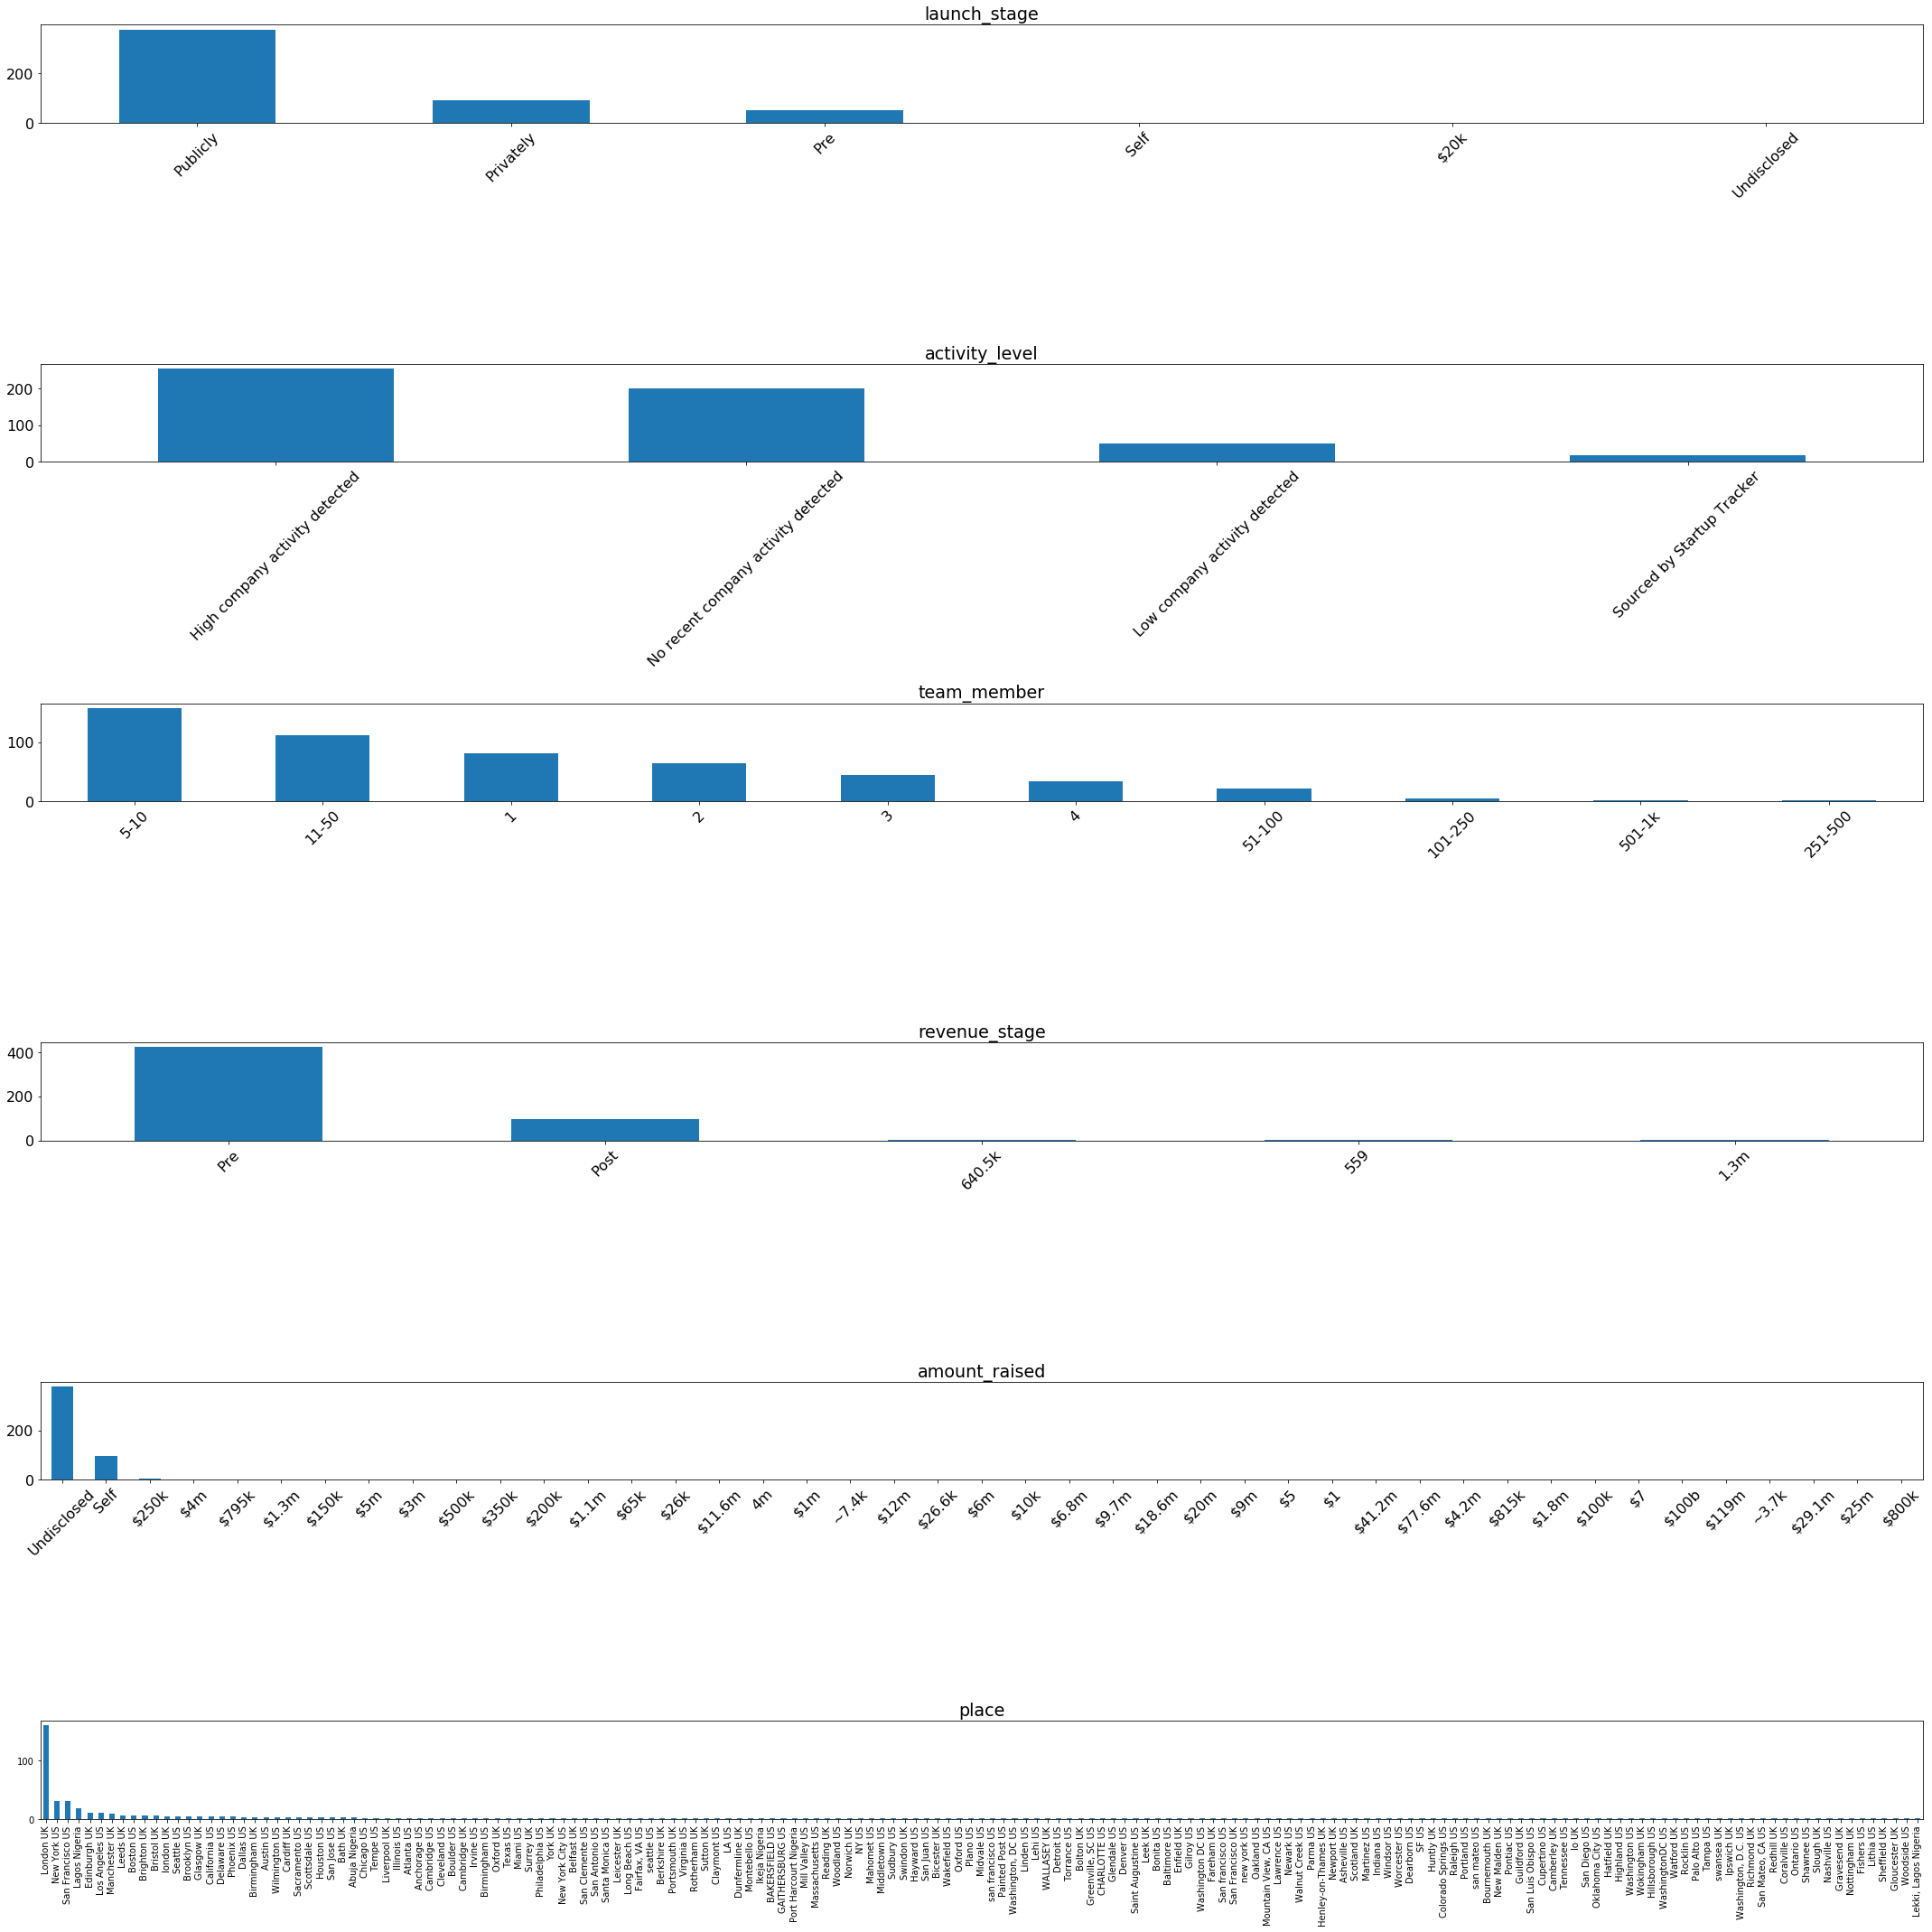

In [19]:
fig, axs = plt.subplots(len(CATEGORICAL_FEATURES), figsize=(30, len(CATEGORICAL_FEATURES) * 5), sharex=False)
plt.rcParams.update({'font.size': 16})
for i, feature in enumerate(CATEGORICAL_FEATURES):
    if feature != 'place':
        df_startups[feature].value_counts().plot(ax=axs[i], kind = 'bar', title = feature, fontsize = 16, rot = 45)
    else:
        df_startups[feature].value_counts().plot(ax=axs[i], kind = 'bar', title = feature)
plt.tight_layout()
plt.show()

In [20]:
# Tabular data

print(df_startups['launch_stage'].value_counts())
print("----------------------------------------------")
print(df_startups['activity_level'].value_counts())
print("----------------------------------------------")
print(df_startups['team_member'].value_counts())
print("----------------------------------------------")
print(df_startups['revenue_stage'].value_counts())
print("----------------------------------------------")
print(df_startups['amount_raised'].value_counts())
print("----------------------------------------------")
print(df_startups['place'].value_counts())

Publicly       377
Privately       92
Pre             50
Self             1
$20k             1
Undisclosed      1
Name: launch_stage, dtype: int64
----------------------------------------------
High company activity detected         253
No recent company activity detected    199
Low company activity detected           51
Sourced by Startup Tracker              19
Name: activity_level, dtype: int64
----------------------------------------------
5-10       158
11-50      112
1           81
2           64
3           45
4           33
51-100      21
101-250      5
501-1k       2
251-500      1
Name: team_member, dtype: int64
----------------------------------------------
Pre       422
Post       97
640.5k      1
559         1
1.3m        1
Name: revenue_stage, dtype: int64
----------------------------------------------
Undisclosed    378
Self            97
$250k            3
$4m              2
$795k            2
$1.3m            2
$150k            2
$5m              1
$3m              1
$

### Exploring numerical values

In [21]:
df_startups.describe()

,pageviews,twitter_followers
count,5.220000e+02,5.220000e+02
mean,2.648828e+05,1.947687e+05
std,4.987107e+06,9.917248e+05
min,0.000000e+00,1.000000e+00
25%,7.750000e+01,4.025000e+01
50%,1.800000e+03,3.560000e+02
75%,9.300000e+03,1.600000e+03
max,1.131000e+08,9.200000e+06


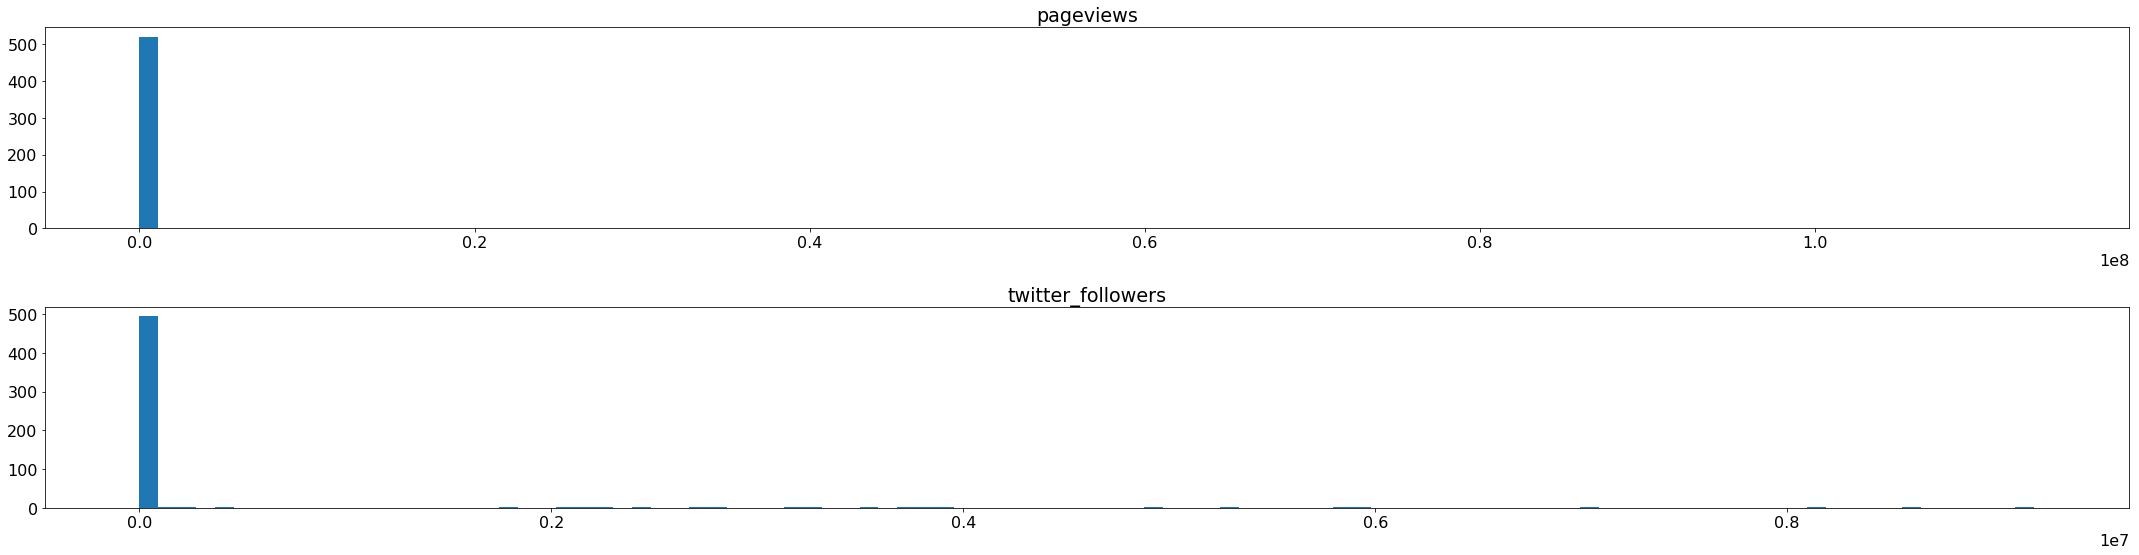

In [22]:
fig, axs = plt.subplots(2, figsize=(30, 8), sharex=False)
plt.rcParams.update({'font.size': 16})
axs[0].hist(df_startups['pageviews'], bins=100)
axs[0].set_title('pageviews')
axs[1].hist(df_startups['twitter_followers'], bins=100)
axs[1].set_title('twitter_followers')
plt.tight_layout()
plt.show()

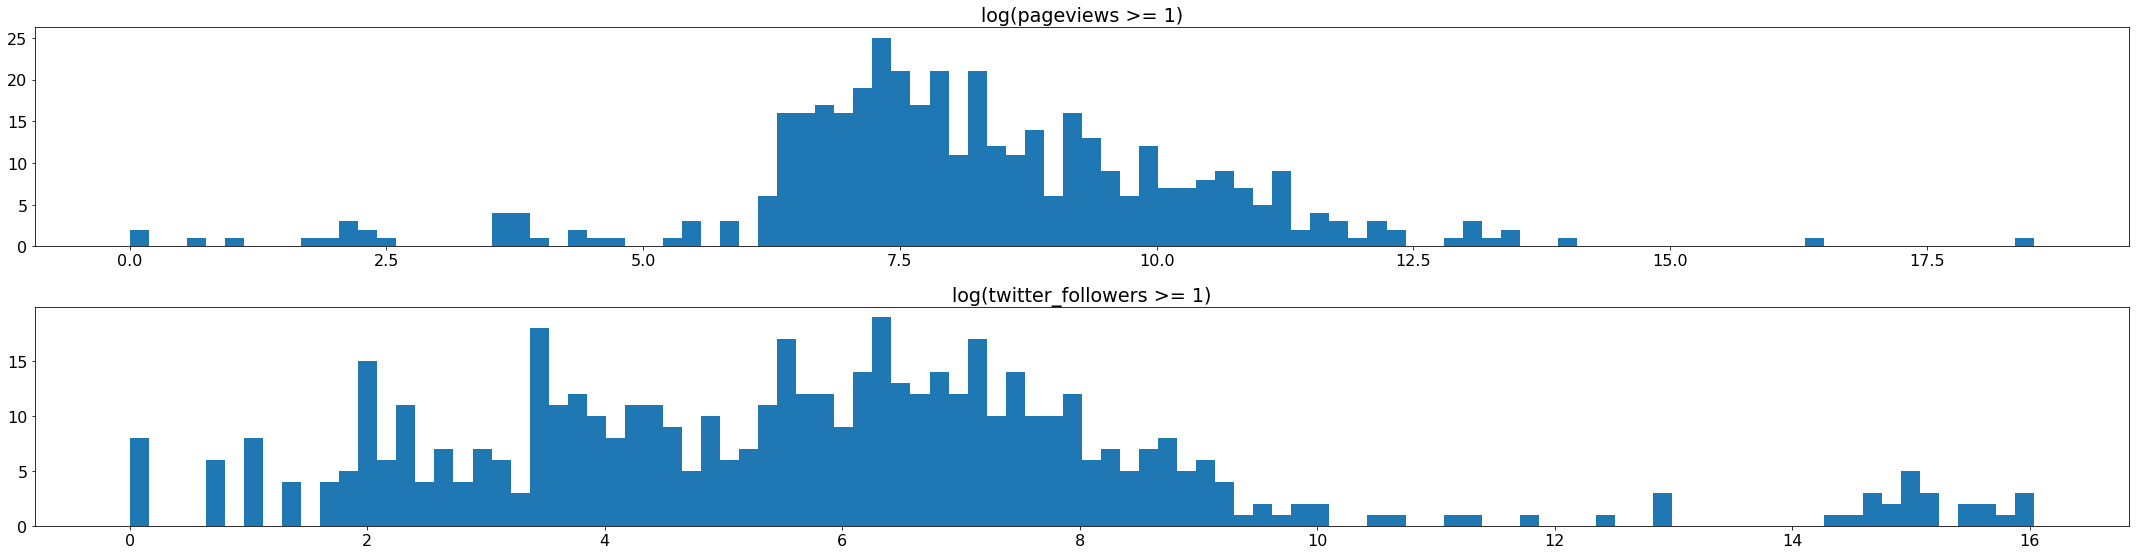

In [23]:
# Applying log

fig, axs = plt.subplots(2, figsize=(30, 8), sharex=False)
plt.rcParams.update({'font.size': 16})
axs[0].hist(np.log(df_startups[df_startups['pageviews'] >= 1]['pageviews']), bins=100)
axs[0].set_title('log(pageviews >= 1)')
axs[1].hist(np.log(df_startups[df_startups['twitter_followers'] >= 1]['twitter_followers']), bins=100)
axs[1].set_title('log(twitter_followers >= 1)')
plt.tight_layout()
plt.show()

In [24]:
print(f"There are {len(df_startups[df_startups['pageviews'] == 0])} out of {len(df_startups)} startups with 0 pageviews")
print(f"There are {len(df_startups[df_startups['twitter_followers'] == 0])} out of {len(df_startups)} startups with 0 twitter_followers")

There are 108 out of 522 startups with 0 pageviews
There are 0 out of 522 startups with 0 twitter_followers


### Exploring date values

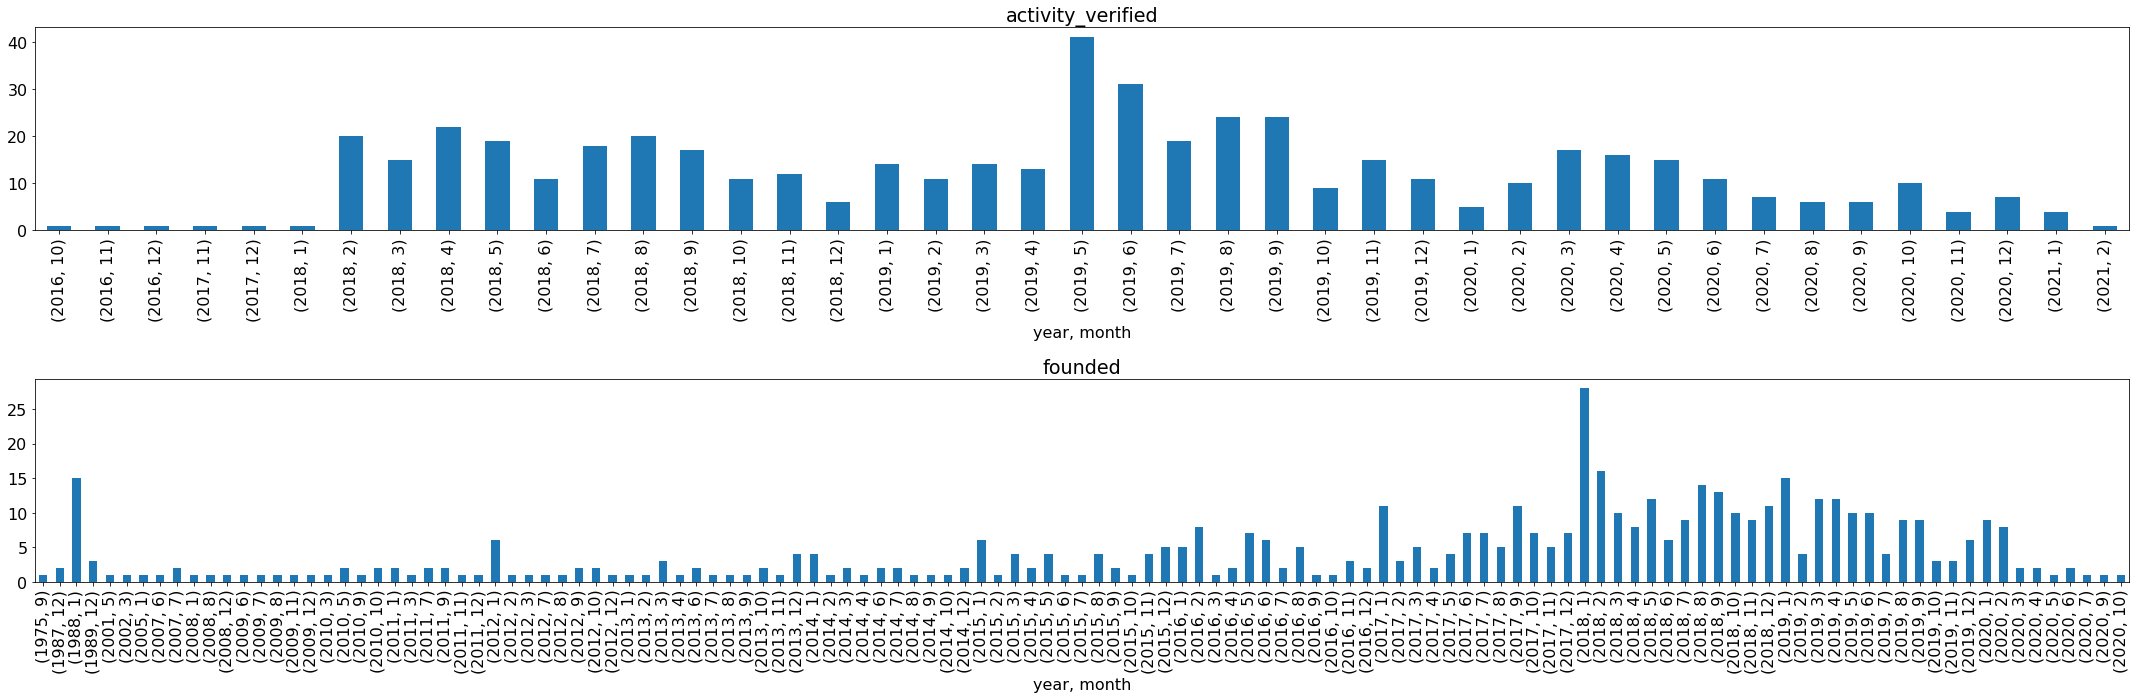

In [25]:
fig, axs = plt.subplots(2, figsize=(30, 10), sharex=False)
plt.rcParams.update({'font.size': 16})
df_startups.groupby([df_startups["activity_verified"].dt.year, df_startups["activity_verified"].dt.month])['name'].count().plot(ax=axs[0], kind="bar", title = "activity_verified", fontsize = 16)
df_startups.groupby([df_startups["founded"].dt.year, df_startups["founded"].dt.month])['name'].count().plot(ax=axs[1], kind="bar", title = "founded", fontsize = 16)
axs[0].get_xaxis().set_label_text('year, month')
axs[1].get_xaxis().set_label_text('year, month')
plt.tight_layout()
plt.show()

### Visualizing correlation between numerical features

In [26]:
# Extracting month and year from date features

df_startups['activity_verified_year'] = df_startups["activity_verified"].dt.year
df_startups['activity_verified_month'] = df_startups["activity_verified"].dt.month
df_startups['founded_year'] = df_startups["founded"].dt.year
df_startups['founded_month'] = df_startups["founded"].dt.month
print(df_startups.dtypes)
df_startups.head()

market                             object
launch_stage                       object
activity_level                     object
activity_verified          datetime64[ns]
pageviews                         float64
team_member                        object
revenue_stage                      object
twitter_followers                 float64
amount_raised                      object
company_website                    object
description                        object
name                               object
founded                    datetime64[ns]
place                              object
activity_verified_year              int64
activity_verified_month             int64
founded_year                        int64
founded_month                       int64
dtype: object


,market,launch_stage,activity_level,activity_verified,pageviews,team_member,revenue_stage,twitter_followers,amount_raised,company_website,description,name,founded,place,activity_verified_year,activity_verified_month,founded_year,founded_month
0,"'marketing', 'productivity', 'social networks'...",Publicly,Low company activity detected,2021-01-21,72600.0,11-50,Post,184.0,Undisclosed,https://socialmeep.com?ref=startuptracker,'SocialMeep builds automatic growth and market...,'SocialMeep',2018-03-03,New York US,2021,1,2018,3
1,"'design', 'education', 'software dev'",Publicly,High company activity detected,2021-01-15,18900.0,4,Pre,590.0,Undisclosed,http://DesignerUp.co?ref=startuptracker,'An ecosystem of UI/UX and product design reso...,'DesignerUp',2018-10-21,San Francisco US,2021,1,2018,10
2,"'advertising', 'marketing', 'startups', 'content'",Publicly,High company activity detected,2021-01-14,1700.0,4,Pre,7.0,Undisclosed,https://katang.io/?t_pid=2?ref=startuptracker,'KaTang is an end-to-end content marketing pla...,'KaTang',2019-11-01,Lehi US,2021,1,2019,11
3,"'advertising', 'e commerce', 'media', 'content'",Publicly,High company activity detected,2020-12-30,5000.0,5-10,Pre,11.0,Undisclosed,https://www.freedomrains.com/?ac=218B21?ref=st...,'Shopping assistant browser extension that pro...,"'Above & Beyond Studios, Inc.'",2019-06-26,Boston US,2020,12,2019,6
4,"'security', 'blockchain'",Publicly,No recent company activity detected,2020-12-29,957.0,5-10,Post,17.0,Undisclosed,http://vyrocapp.com?ref=startuptracker,"'Private Search Engine, Powered by the Blockch...",'Vyroc',2020-01-01,New York US,2020,12,2020,1


In [27]:
df_startups.columns

Index(['market', 'launch_stage', 'activity_level', 'activity_verified',
       'pageviews', 'team_member', 'revenue_stage', 'twitter_followers',
       'amount_raised', 'company_website', 'description', 'name', 'founded',
       'place', 'activity_verified_year', 'activity_verified_month',
       'founded_year', 'founded_month'],
      dtype='object')

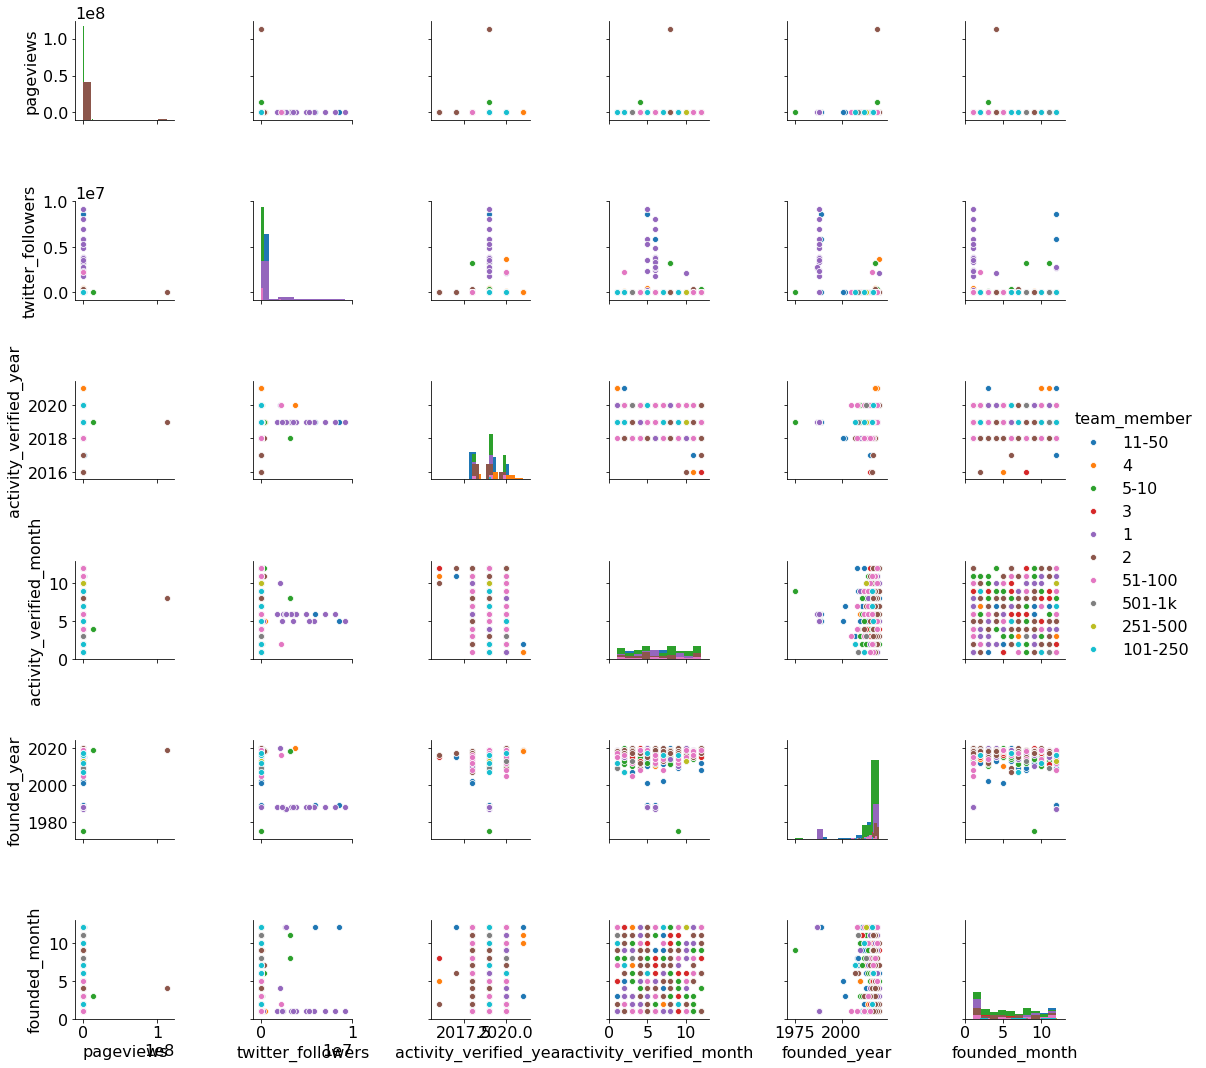

In [28]:
sns.pairplot(df_startups, hue='team_member', diag_kind='hist')

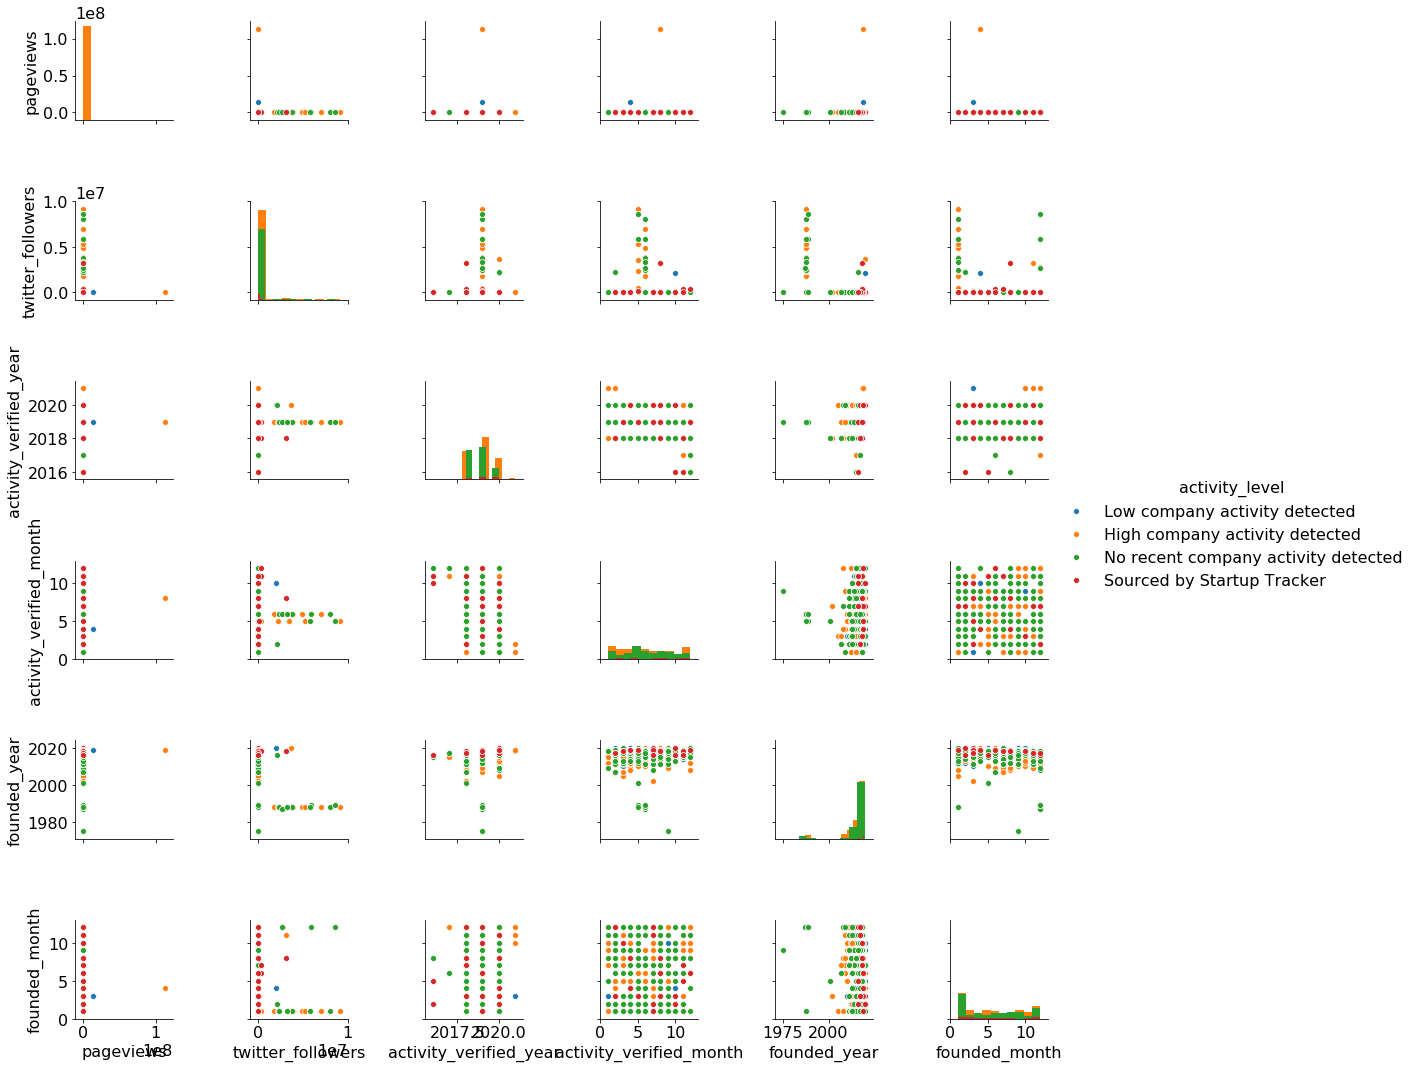

In [29]:
sns.pairplot(df_startups, hue='activity_level', diag_kind='hist')